In [92]:
import numpy as np
from scipy.optimize import check_grad
import copy

Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]


mu = np.zeros(2) # mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) # covariance matrix
num_samples = 4  # Number of samples you want to generate
alpha = 5 # Define alpha

point_number = 1 # Point you want to test
point_index = 0 # Index you want to test

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points

In [93]:
def function(point):
    sum = 0
    for edge_m in range(len(Y)):
        connection = Y[edge_m][0] # Check to see if point_number is part of the edge
        point_1 = point[Y[edge_m][1]]
        point_2 = point[Y[edge_m][2]]
        norm_distance_squared = np.linalg.norm(point_1 - point_2) ** 2
        exponent = -connection * (alpha - norm_distance_squared)
        sigmoid_value = 1 / (1 + np.exp(exponent))
        sum += np.log(sigmoid_value)
    return sum

def grad(point_number, index_i, point):
    gradient = 0
    for edge_m in range(len(Y)):
        if ((Y[edge_m][1] == point_number) or (Y[edge_m][2] == point_number)): # Check to see if point_number is part of the edge
            connection = Y[edge_m][0] # Check to see if point_number is part of the edge
            point_1 = point[Y[edge_m][1]]
            point_2 = point[Y[edge_m][2]]
            distance = (np.linalg.norm(point_1 - point_2))**2
    
            numerator = -2 * connection * (point_1[index_i] - point_2[index_i]) * np.exp(-connection * (alpha - distance))
            denominator = 1 + np.exp(-connection * (alpha - distance))
            gradient += numerator / denominator
    return gradient


In [94]:
# Function af x
sum = function(points)
print(sum)

# Function af x+epsilon
point_e = copy.deepcopy(points)
point_e[point_number][point_index] += 0.001
sum_e = function(point_e)
print(sum_e)

# Gradient af x
gradient = grad(point_number,point_index,points)
print(gradient)

# Error
(sum_e-sum)/0.001-(gradient)

-7.809507322059028
-7.806882159511672
2.623303646181747


0.0018589011743719297

In [95]:
hist = np.zeros(1000)
for n in range(1000):
    points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}
    
    sum = function(points)

    point_e = copy.deepcopy(points)
    point_e[point_number][point_index] += 0.001
    sum_e = function(point_e)
    
    gradient = grad(point_number,point_index,points)
            
    hist[n] = (sum_e-sum)/0.001-(gradient)

(array([  1.,   0.,   1.,   2.,   1.,   3.,   2.,   3.,   3.,   6.,  12.,
          9.,   9.,  19.,  21.,  36.,  31.,  73.,  49.,  59.,  70., 111.,
         57.,  63.,  69.,  98.,  40.,  30.,  43.,  79.]),
 array([-5.25380791e-03, -5.01280493e-03, -4.77180195e-03, -4.53079898e-03,
        -4.28979600e-03, -4.04879302e-03, -3.80779004e-03, -3.56678706e-03,
        -3.32578408e-03, -3.08478111e-03, -2.84377813e-03, -2.60277515e-03,
        -2.36177217e-03, -2.12076919e-03, -1.87976621e-03, -1.63876324e-03,
        -1.39776026e-03, -1.15675728e-03, -9.15754300e-04, -6.74751322e-04,
        -4.33748344e-04, -1.92745365e-04,  4.82576131e-05,  2.89260592e-04,
         5.30263570e-04,  7.71266548e-04,  1.01226953e-03,  1.25327251e-03,
         1.49427548e-03,  1.73527846e-03,  1.97628144e-03]),
 <BarContainer object of 30 artists>)

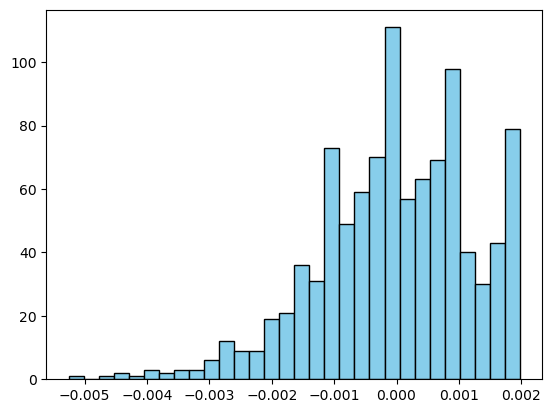

In [96]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')